In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('processed_data_fin.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615650 entries, 0 to 615649
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   loan_type                                 615650 non-null  int64  
 1   loan_amount                               615650 non-null  int64  
 2   action_taken                              615650 non-null  int64  
 3   occupancy_type                            615650 non-null  int64  
 4   census_tract                              615650 non-null  float64
 5   applicant_ethnicity_1                     615650 non-null  float64
 6   co_applicant_ethnicity_1                  615650 non-null  float64
 7   applicant_race_1                          615650 non-null  float64
 8   co_applicant_race_1                       615650 non-null  float64
 9   applicant_sex                             615650 non-null  int64  
 10  co_applicant_sex    

In [4]:
df.corr()

,loan_type,loan_amount,action_taken,occupancy_type,census_tract,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,co_applicant_race_1,applicant_sex,...,total_units,aus_1,reverse_mortgage,open_end_line_of_credit,manufactured_home_land_property_interest,total_loan_costs,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features
loan_type,1.000000,-0.092928,-0.021677,-0.099836,0.010038,-0.006486,0.038757,-0.027845,0.015822,-0.042945,...,-0.007241,-0.059508,-0.060066,-0.060154,-0.060035,0.082359,-0.060154,-0.060139,-0.060152,-0.060163
loan_amount,-0.092928,1.000000,-0.047498,-0.013882,-0.148082,0.000069,-0.119847,0.049988,-0.048268,-0.105201,...,0.022831,-0.099611,-0.101793,-0.101995,-0.101435,0.024423,-0.101995,-0.102082,-0.101992,-0.101995
action_taken,-0.021677,-0.047498,1.000000,0.016705,0.003967,-0.001945,0.002335,-0.005278,-0.001933,0.003362,...,0.024781,0.458002,0.458361,0.458013,0.458902,0.173007,0.458013,0.458013,0.458013,0.458013
occupancy_type,-0.099836,-0.013882,0.016705,1.000000,-0.022355,0.004147,-0.017543,0.002773,-0.009737,-0.034208,...,0.185942,0.088349,0.087576,0.088398,0.087647,0.041618,0.088398,0.088394,0.088397,0.088401
census_tract,0.010038,-0.148082,0.003967,-0.022355,1.000000,0.006815,-0.001668,-0.002165,-0.008880,0.003832,...,-0.001561,0.021189,0.021625,0.021399,0.021266,-0.005587,0.021399,0.021403,0.021400,0.021386
applicant_ethnicity_1,-0.006486,0.000069,-0.001945,0.004147,0.006815,1.000000,0.137179,0.026996,0.018146,0.001608,...,-0.002884,-0.001657,-0.001667,-0.001676,-0.001797,0.001290,-0.001676,-0.001676,-0.001676,-0.001675
co_applicant_ethnicity_1,0.038757,-0.119847,0.002335,-0.017543,-0.001668,0.137179,1.000000,-0.017377,0.588026,0.141381,...,0.012495,-0.022843,-0.022451,-0.022476,-0.022415,0.010673,-0.022476,-0.022464,-0.022475,-0.022476
applicant_race_1,-0.027845,0.049988,-0.005278,0.002773,-0.002165,0.026996,-0.017377,1.000000,0.357981,-0.020137,...,-0.003672,-0.004165,-0.004489,-0.004483,-0.004506,-0.002833,-0.004483,-0.004485,-0.004483,-0.004481
co_applicant_race_1,0.015822,-0.048268,-0.001933,-0.009737,-0.008880,0.018146,0.588026,0.357981,1.000000,0.092575,...,0.009788,-0.020487,-0.020432,-0.020451,-0.020606,0.009514,-0.020451,-0.020442,-0.020450,-0.020449
applicant_sex,-0.042945,-0.105201,0.003362,-0.034208,0.003832,0.001608,0.141381,-0.020137,0.092575,1.000000,...,-0.011837,-0.020511,-0.020174,-0.020264,-0.020185,-0.005330,-0.020264,-0.020251,-0.020263,-0.020264


In [5]:
df_test = df.copy()

In [6]:
correlation_matrix = df_test.corr()

In [7]:
correlation_matrix

,loan_type,loan_amount,action_taken,occupancy_type,census_tract,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,co_applicant_race_1,applicant_sex,...,total_units,aus_1,reverse_mortgage,open_end_line_of_credit,manufactured_home_land_property_interest,total_loan_costs,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features
loan_type,1.000000,-0.092928,-0.021677,-0.099836,0.010038,-0.006486,0.038757,-0.027845,0.015822,-0.042945,...,-0.007241,-0.059508,-0.060066,-0.060154,-0.060035,0.082359,-0.060154,-0.060139,-0.060152,-0.060163
loan_amount,-0.092928,1.000000,-0.047498,-0.013882,-0.148082,0.000069,-0.119847,0.049988,-0.048268,-0.105201,...,0.022831,-0.099611,-0.101793,-0.101995,-0.101435,0.024423,-0.101995,-0.102082,-0.101992,-0.101995
action_taken,-0.021677,-0.047498,1.000000,0.016705,0.003967,-0.001945,0.002335,-0.005278,-0.001933,0.003362,...,0.024781,0.458002,0.458361,0.458013,0.458902,0.173007,0.458013,0.458013,0.458013,0.458013
occupancy_type,-0.099836,-0.013882,0.016705,1.000000,-0.022355,0.004147,-0.017543,0.002773,-0.009737,-0.034208,...,0.185942,0.088349,0.087576,0.088398,0.087647,0.041618,0.088398,0.088394,0.088397,0.088401
census_tract,0.010038,-0.148082,0.003967,-0.022355,1.000000,0.006815,-0.001668,-0.002165,-0.008880,0.003832,...,-0.001561,0.021189,0.021625,0.021399,0.021266,-0.005587,0.021399,0.021403,0.021400,0.021386
applicant_ethnicity_1,-0.006486,0.000069,-0.001945,0.004147,0.006815,1.000000,0.137179,0.026996,0.018146,0.001608,...,-0.002884,-0.001657,-0.001667,-0.001676,-0.001797,0.001290,-0.001676,-0.001676,-0.001676,-0.001675
co_applicant_ethnicity_1,0.038757,-0.119847,0.002335,-0.017543,-0.001668,0.137179,1.000000,-0.017377,0.588026,0.141381,...,0.012495,-0.022843,-0.022451,-0.022476,-0.022415,0.010673,-0.022476,-0.022464,-0.022475,-0.022476
applicant_race_1,-0.027845,0.049988,-0.005278,0.002773,-0.002165,0.026996,-0.017377,1.000000,0.357981,-0.020137,...,-0.003672,-0.004165,-0.004489,-0.004483,-0.004506,-0.002833,-0.004483,-0.004485,-0.004483,-0.004481
co_applicant_race_1,0.015822,-0.048268,-0.001933,-0.009737,-0.008880,0.018146,0.588026,0.357981,1.000000,0.092575,...,0.009788,-0.020487,-0.020432,-0.020451,-0.020606,0.009514,-0.020451,-0.020442,-0.020450,-0.020449
applicant_sex,-0.042945,-0.105201,0.003362,-0.034208,0.003832,0.001608,0.141381,-0.020137,0.092575,1.000000,...,-0.011837,-0.020511,-0.020174,-0.020264,-0.020185,-0.005330,-0.020264,-0.020251,-0.020263,-0.020264


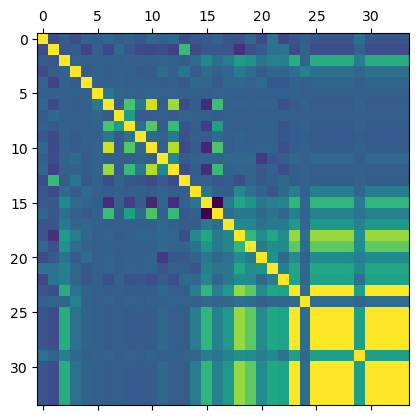

In [8]:
plt.matshow(correlation_matrix)
plt.show()

In [9]:
correlation_with_target = correlation_matrix['action_taken'].drop('action_taken')

In [10]:
correlation_with_target

loan_type                                  -0.021677
loan_amount                                -0.047498
occupancy_type                              0.016705
census_tract                                0.003967
applicant_ethnicity_1                      -0.001945
co_applicant_ethnicity_1                    0.002335
applicant_race_1                           -0.005278
co_applicant_race_1                        -0.001933
applicant_sex                               0.003362
co_applicant_sex                            0.002655
applicant_age                               0.017450
co_applicant_age                            0.007275
income                                     -0.015103
lien_status                                 0.065984
applicant_credit_score_type                 0.233843
co_applicant_credit_score_type              0.087864
origination_charges                         0.155571
interest_rate                               0.356010
debt_to_income_ratio                        0.

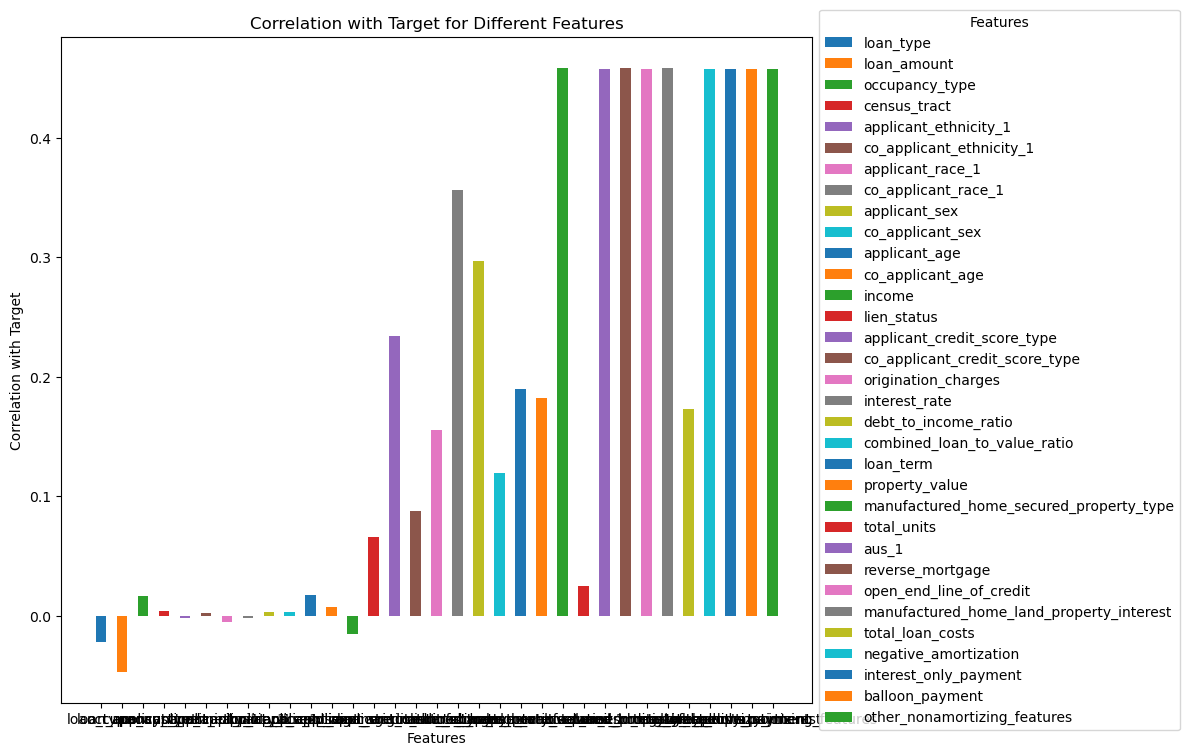

In [11]:
from itertools import cycle  
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
bar_width = 0.5 

for i, (feature, correlation) in enumerate(correlation_with_target.items()):
    color = next(color_cycle)
    plt.bar(i, correlation, width=bar_width, color=color, label=feature)

# Add x ticks and labels
plt.xticks(range(len(correlation_with_target)), correlation_with_target.index)

plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation with Target for Different Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Features')

plt.tight_layout()
plt.show()

In [12]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
target_variable = "action_taken"

In [14]:
X = df_test.drop(columns=[target_variable])
y = df_test[target_variable]

In [15]:
print(X.shape, y.shape)

(615650, 33) (615650,)


In [16]:
seed = 123

In [17]:
# 1- loan originated
# 2- application approved but not accepted
# 3- application denied
# 4 - application withdrawn by applicant
# 5 - file closed for incompleteness
# 6 - purchased loan
# 7 - Pre-approval request denied
# 8 - pre-approval request approved but not accepted

y.value_counts()

1    609255
3      2771
4      2287
2       849
5       357
6        67
8        49
7        15
Name: action_taken, dtype: int64

In [19]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)

In [18]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state=seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

y_pred = model.predict(X)

C:\Users\marku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(y, y_pred)

print(classification_report(y, y_pred, zero_division=0))

In [ ]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Save the model to a file
filename = 'logistic_regression_model.pkl'
joblib.dump(model, filename)
print('Model saved to', filename)